In [4]:
# Set up and load data
# Includes
import sys
import os
import numpy as np
import json
import os


# Setup paths containing utility
curr_folder = os.getcwd()
sys.path.insert(0, os.path.join(curr_folder,'../app'))

# Load the training data
from utils import load_SQuAD_train
arts = load_SQuAD_train()


In [5]:
# All articles
Narticles = len(arts)
print ("Narticles = " +  str(Narticles)) 


Narticles = 442


In [326]:
arts[0]['paragraphs'][0]['qas'][0]['answers']

[{'text': 'in the late 1990s', 'answer_start': 269}]

In [327]:
arts[0]['paragraphs'][0]['context']

'Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny\'s Child. Managed by her father, Mathew Knowles, the group became one of the world\'s best-selling girl groups of all time. Their hiatus saw the release of Beyoncé\'s debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".'

In [379]:
art = arts[:]
# for a in art:
#     for p in a['paragraphs']:
#         print(p['context'] + '\n')

# Do some basic plots of article stats only

## Words per paragraph

In [380]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

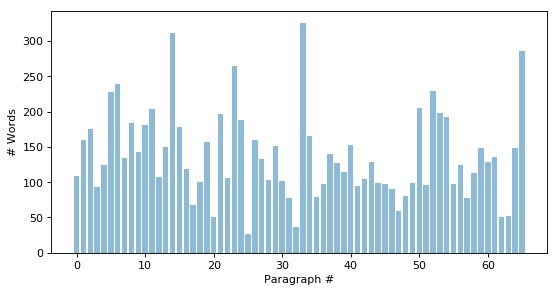

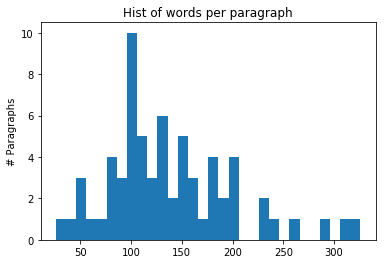

In [381]:
# Words per paragraph
a = art[0]
pwords = [len(p['context'].split()) for p in a['paragraphs']]

figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(pwords)), pwords, align='center', alpha=0.5)
plt.xlabel('Paragraph #')
plt.ylabel('# Words')
plt.show()

plt.hist(pwords, bins=30)  # arguments are passed to np.histogram
plt.title("Hist of words per paragraph")
plt.ylabel('# Paragraphs')
plt.show()



## Words per article

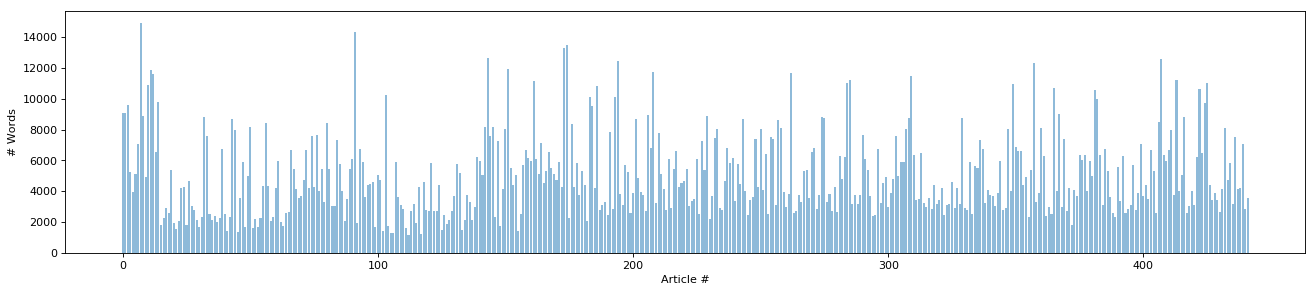

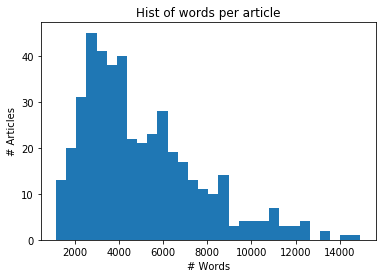

In [383]:
# Number of words per article

awords = []
for a in art:
    pwords = [len(p['context'].split()) for p in a['paragraphs']]
    awords.append(sum(pwords))

 
figure(num=None, figsize=(20, 4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(awords)), awords, align='center', alpha=0.5)
plt.xlabel('Article #')
plt.ylabel('# Words')
plt.show()

plt.hist(awords, bins=30)  # arguments are passed to np.histogram
plt.title("Hist of words per article")
plt.ylabel('# Articles')
plt.xlabel('# Words')
plt.show()


## Questions per article

In [340]:
arts[0]['paragraphs'][0]['qas'][0]['answers'][0]

{'text': 'singing and dancing', 'answer_start': 207}

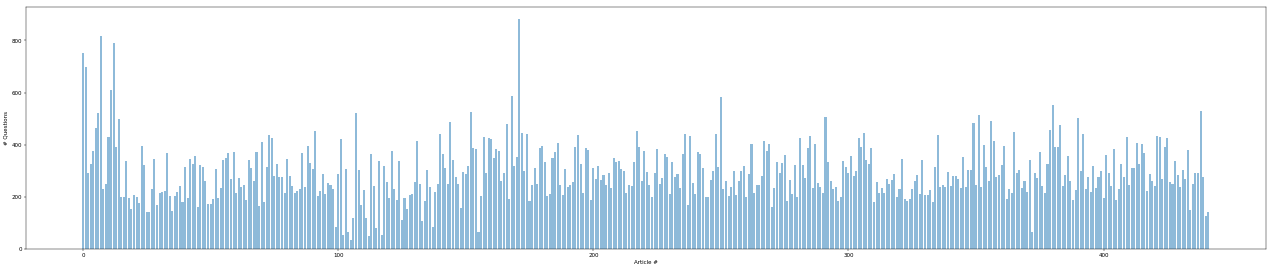

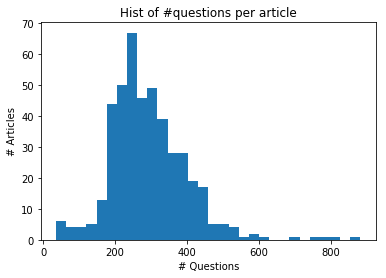

In [394]:
art = arts[:]

aquestions = []
for a in art:
    panswers = [len(p['qas']) for p in a['paragraphs']]
    aquestions.append(sum(panswers))
    


figure(num=None, figsize=(40, 8), dpi=40,facecolor='w', edgecolor='k')
plt.bar(range(len(aquestions)), aquestions, align='center', alpha=0.5)
plt.xlabel('Article #')
plt.ylabel('# Questions')
plt.show()

plt.hist(aquestions, bins=30)  # arguments are passed to np.histogram
plt.title("Hist of #questions per article")
plt.ylabel('# Articles')
plt.xlabel('# Questions')
plt.show()


3

In [ ]:
# Gather all questions together

answers = []
all_questions = [qa['question'] for a in art for p in a['paragraphs'] for qa in p['qas'] for a in qa['answers']]
all_answers = [a['text'] for a in art for p in a['paragraphs'] for qa in p['qas'] for a in qa['answers']]
answer_is_verbatim_in_context = [a['text'] in p['context'] for a in art for p in a['paragraphs'] for qa in p['qas'] for a in qa['answers']]


answers_per_article[for a in art for p in a['paragraphs'] for ]

print('Num answers: ' + str(len(all_answers)))
print('Num true bools: ' + str(sum(answer_is_verbatim_in_context)))

In [ ]:
# Find all answers less than 3 words in duration. These are ideal candidates for fill in the blank questions
a=all_answers[0]
Nmax=3
answer_is_short = [len(a.split()) <= Nmax for a in all_answers]


In [ ]:
# Count number of trues
print('Num answers: ' + str(len(all_answers)))
print('Num true bools: ' + str(sum(answer_is_short)))
print('Percent: ' + str(sum(answer_is_short)/len(all_answers)*100))


In [ ]:
# Display all all answers and their validity
for q,a, context_bool in zip(all_questions,all_answers,answer_is_short):
    print(f"{a}\t\t{context_bool}")

In [ ]:
# Display all question-answer pairs and their validity
for q,a, context_bool in zip(all_questions,all_answers,answer_is_short):
    print(f"{q}\t{a}\t{context_bool}")

In [ ]:


unique_answers = set(all_answers)


print('All answers: ' + str(len(all_answers)))
print('Unique answers: ' + str(len(unique_answers)))


In [ ]:
unique_answers

In [ ]:


text = [p['context'] for a in art for p in a['paragraphs']]
text = ' '.join(text[:])

text


In [ ]:
# Set up and test AllenNLP
# Tags PER, ORG and LOC denote person names, organizations and locations respectively

from allennlp.predictors import Predictor
predictor = Predictor.from_path("/home/davestanley/src/allennlp/ner-model-2018.12.18.tar.gz")
results = predictor.predict(sentence=text)
for word, tag in zip(results["words"], results["tags"]):
    print(f"{word}\t{tag}")


In [ ]:
# Merge contiguous elements in word list together
words = results['words']
tags = results['tags']

# Based on tags
t_new = []
w_new = []
for w,t in zip(words,tags):
         # Intermediate or end
    if (t[0] == 'I') or (t[0] == 'L'):
        if '\'s' in w:
            myspace = ''  # If something involving 's, don't space it out when merging
        else:
            myspace = ' '
        t_new[-1] = ' '.join([t_new[-1], t])
        w_new[-1] = myspace.join([w_new[-1], w])
#     elif (w == ',' and t_new[-1][0] == 'U'):
#         #print(w_new[-1])
#         #t_new[-1] = ''.join([t_new[-1], t])  # Skip the tag for commas
#         w_new[-1] = ''.join([w_new[-1], w])
    else:
        t_new.append(t)
        w_new.append(w)
        


In [ ]:
w_new

In [ ]:
# Python program to illustrate the intersection 
# of two lists in most simple way 
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 
  
# Driver Code 
lst1 = [4, 9, 1, 17, 11, 26, 28, 54, 69] 
lst2 = [9, 9, 74, 21, 45, 11, 63, 28, 26] 
print(intersection(lst1, lst2)) 